# Exploring Model Data

In [1]:
import os

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
os.getcwd()

'/Users/samuelluxenberg/Library/CloudStorage/OneDrive-Personal/GitHub/end-to-end-mlb-betting/notebooks'

In [5]:
path = '../data/processed/model_data.csv'
df = pd.read_csv(path, parse_dates = ['game_date','game_date_time'])

In [6]:
df.shape

(10641, 193)

In [7]:
df.isna().sum().sum() # no missing values

np.int64(0)

In [8]:
df.head(2)

,game_id,game_date,game_date_time,home_team_id,away_team_id,home_team,away_team,home_score,away_score,state,venue,game_type,home_team_rest_days,home_team_games_prev_7days,home_team_season_opener_flag,away_team_rest_days,away_team_games_prev_7days,away_team_season_opener_flag,home_back2back,away_back2back,rest_difference,home_win_rate_last_10,home_avg_run_diff_last_10,home_std_run_diff_last_10,home_avg_runs_scored_last_10,home_std_runs_scored_last_10,home_avg_runs_allowed_last_10,home_std_runs_allowed_last_10,away_win_rate_last_10,away_avg_run_diff_last_10,away_std_run_diff_last_10,away_avg_runs_scored_last_10,away_std_runs_scored_last_10,away_avg_runs_allowed_last_10,away_std_runs_allowed_last_10,game_month,game_day_of_week,game_hour,home_rolling_avg_obp_7days,home_rolling_avg_obp_14days,home_rolling_avg_slg_7days,home_rolling_avg_slg_14days,home_rolling_avg_era_7days,home_rolling_avg_era_14days,home_rolling_avg_whip_7days,home_rolling_avg_whip_14days,home_rolling_avg_strikeouts_pitching_7days,home_rolling_avg_strikeouts_pitching_14days,home_rolling_avg_baseonballs_pitching_7days,home_rolling_avg_baseonballs_pitching_14days,home_rolling_avg_hits_pitching_7days,home_rolling_avg_hits_pitching_14days,home_rolling_std_obp_7days,home_rolling_std_obp_14days,home_rolling_std_slg_7days,home_rolling_std_slg_14days,home_rolling_std_era_7days,home_rolling_std_era_14days,home_rolling_std_whip_7days,home_rolling_std_whip_14days,home_rolling_std_strikeouts_pitching_7days,home_rolling_std_strikeouts_pitching_14days,home_rolling_std_baseonballs_pitching_7days,home_rolling_std_baseonballs_pitching_14days,home_rolling_std_hits_pitching_7days,home_rolling_std_hits_pitching_14days,home_obp_lag1,home_obp_lag2,home_obp_lag3,home_slg_lag1,home_slg_lag2,home_slg_lag3,home_era_lag1,home_era_lag2,home_era_lag3,home_whip_lag1,home_whip_lag2,home_whip_lag3,home_strikeouts_pitching_lag1,home_strikeouts_pitching_lag2,home_strikeouts_pitching_lag3,home_baseonballs_pitching_lag1,home_baseonballs_pitching_lag2,home_baseonballs_pitching_lag3,home_hits_pitching_lag1,home_hits_pitching_lag2,home_hits_pitching_lag3,away_rolling_avg_obp_7days,away_rolling_avg_obp_14days,away_rolling_avg_slg_7days,away_rolling_avg_slg_14days,away_rolling_avg_era_7days,away_rolling_avg_era_14days,away_rolling_avg_whip_7days,away_rolling_avg_whip_14days,away_rolling_avg_strikeouts_pitching_7days,away_rolling_avg_strikeouts_pitching_14days,away_rolling_avg_baseonballs_pitching_7days,away_rolling_avg_baseonballs_pitching_14days,away_rolling_avg_hits_pitching_7days,away_rolling_avg_hits_pitching_14days,away_rolling_std_obp_7days,away_rolling_std_obp_14days,away_rolling_std_slg_7days,away_rolling_std_slg_14days,away_rolling_std_era_7days,away_rolling_std_era_14days,away_rolling_std_whip_7days,away_rolling_std_whip_14days,away_rolling_std_strikeouts_pitching_7days,away_rolling_std_strikeouts_pitching_14days,away_rolling_std_baseonballs_pitching_7days,away_rolling_std_baseonballs_pitching_14days,away_rolling_std_hits_pitching_7days,away_rolling_std_hits_pitching_14days,away_obp_lag1,away_obp_lag2,away_obp_lag3,away_slg_lag1,away_slg_lag2,away_slg_lag3,away_era_lag1,away_era_lag2,away_era_lag3,away_whip_lag1,away_whip_lag2,away_whip_lag3,away_strikeouts_pitching_lag1,away_strikeouts_pitching_lag2,away_strikeouts_pitching_lag3,away_baseonballs_pitching_lag1,away_baseonballs_pitching_lag2,away_baseonballs_pitching_lag3,away_hits_pitching_lag1,away_hits_pitching_lag2,away_hits_pitching_lag3,rolling_avg_obp_7days_diff,rolling_avg_obp_7days_ratio,rolling_avg_obp_14days_diff,rolling_avg_obp_14days_ratio,rolling_avg_slg_7days_diff,rolling_avg_slg_7days_ratio,rolling_avg_slg_14days_diff,rolling_avg_slg_14days_ratio,rolling_avg_era_7days_diff,rolling_avg_era_7days_ratio,rolling_avg_era_14days_diff,rolling_avg_era_14days_ratio,rolling_avg_whip_7days_diff,rolling_avg_whip_7days_ratio,rolling_avg_whip_14days_diff,rolling_avg_whip_14days_ratio,rolling_avg_strikeouts_pitching_7days_diff,rolling_avg_strik

In [9]:
target = 'home_win'

In [10]:
df[target].value_counts(dropna=False)

home_win
1    5656
0    4985
Name: count, dtype: int64

In [11]:
df[target].mean()

np.float64(0.5315289916361244)

- Home team wins 53% of time

In [12]:
df.groupby(['home_team','venue'])[target].agg({'size','sum','mean'}).sort_values('sum', ascending=False)

,,sum,size,mean
home_team,venue,,,
Los Angeles Dodgers,Dodger Stadium,249,365,0.682192
Philadelphia Phillies,Citizens Bank Park,218,350,0.622857
Atlanta Braves,Truist Park,214,352,0.607955
Milwaukee Brewers,American Family Field,210,362,0.580110
San Francisco Giants,Oracle Park,208,361,0.576177
Seattle Mariners,T-Mobile Park,206,363,0.567493
New York Mets,Citi Field,203,338,0.600592
New York Yankees,Yankee Stadium,200,346,0.578035
San Diego Padres,Petco Park,197,355,0.554930


- Clearly the better teams have higher home win %, but how much of that is due to the team and its skill vs. the quirks of the individual ballpark?

# At the end of the day, we're interested in predictive power of `home_win`.

In [13]:
df.columns[df.columns.str.contains('rest')]

Index(['home_team_rest_days', 'away_team_rest_days', 'rest_difference'], dtype='object')

In [14]:
df.groupby('rest_difference')[target].agg({'size','mean'})

,size,mean
rest_difference,,
-7.0,1,0.000000
-4.0,1,0.000000
-2.0,6,0.833333
-1.0,374,0.524064
0.0,9828,0.532051
1.0,415,0.525301
2.0,10,0.500000
4.0,3,0.000000
6.0,2,1.000000


- About the same chance of home winning between -1 and 1 rest difference.
- Probably too small a sample to say anything definitively outside of this interval.

In [15]:
display(df.groupby('home_back2back')[target].agg({'size','mean'}))
display(df.groupby('away_back2back')[target].agg({'size','mean'}))

,size,mean
home_back2back,,
0,1624,0.513547
1,9017,0.534768


,size,mean
away_back2back,,
0,1578,0.516477
1,9063,0.534150


In [16]:
display(df.groupby('home_team_games_prev_7days')[target].agg({'size','mean'}))
display(df.groupby('away_team_games_prev_7days')[target].agg({'size','mean'}))

,size,mean
home_team_games_prev_7days,,
0.0,77,0.532468
1.0,85,0.494118
2.0,174,0.534483
3.0,243,0.510288
4.0,689,0.510885
5.0,3263,0.517315
6.0,4634,0.543807
7.0,1413,0.542109
8.0,63,0.476190


,size,mean
away_team_games_prev_7days,,
0.0,77,0.532468
1.0,87,0.494253
2.0,167,0.532934
3.0,254,0.523622
4.0,716,0.561453
5.0,3407,0.523921
6.0,4508,0.527728
7.0,1388,0.551153
8.0,37,0.513514


<Axes: xlabel='home_win_rate_last_10', ylabel='Density'>

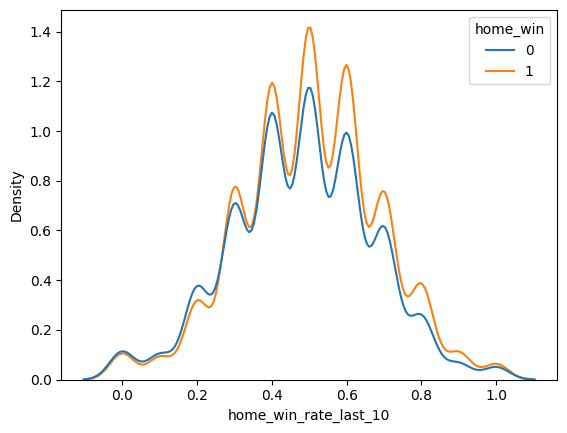

In [17]:
sns.kdeplot(x='home_win_rate_last_10', data=df, hue=target)

In [62]:
df.columns[160:194]

Index(['rolling_avg_hits_pitching_7days_diff',
       'rolling_avg_hits_pitching_7days_ratio',
       'rolling_avg_hits_pitching_14days_diff',
       'rolling_avg_hits_pitching_14days_ratio', 'rolling_std_obp_7days_diff',
       'rolling_std_obp_7days_ratio', 'rolling_std_obp_14days_diff',
       'rolling_std_obp_14days_ratio', 'rolling_std_slg_7days_diff',
       'rolling_std_slg_7days_ratio', 'rolling_std_slg_14days_diff',
       'rolling_std_slg_14days_ratio', 'rolling_std_era_7days_diff',
       'rolling_std_era_7days_ratio', 'rolling_std_era_14days_diff',
       'rolling_std_era_14days_ratio', 'rolling_std_whip_7days_diff',
       'rolling_std_whip_7days_ratio', 'rolling_std_whip_14days_diff',
       'rolling_std_whip_14days_ratio',
       'rolling_std_strikeouts_pitching_7days_diff',
       'rolling_std_strikeouts_pitching_7days_ratio',
       'rolling_std_strikeouts_pitching_14days_diff',
       'rolling_std_strikeouts_pitching_14days_ratio',
       'rolling_std_baseonballs_pitc

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(min_samples_split=8, n_jobs=-1, min_samples_leaf=5) 

In [21]:
df_model = df.sort_values('game_date_time')

In [22]:
df_train = df_model[df_model['game_date']<'2025-05-01']
df_test = df_model[df_model['game_date']>='2025-05-01']

In [23]:
df_train.shape, df_test.shape

((9975, 193), (666, 193))

In [24]:
id_cols = df.columns[df.columns.str.contains('id')]

In [66]:
df['state'].value_counts()

state
Final              10614
Completed Early       27
Name: count, dtype: int64

In [25]:
df.columns[:20]

Index(['game_id', 'game_date', 'game_date_time', 'home_team_id',
       'away_team_id', 'home_team', 'away_team', 'home_score', 'away_score',
       'state', 'venue', 'game_type', 'home_team_rest_days',
       'home_team_games_prev_7days', 'home_team_season_opener_flag',
       'away_team_rest_days', 'away_team_games_prev_7days',
       'away_team_season_opener_flag', 'home_back2back', 'away_back2back'],
      dtype='object')

In [26]:
[col for col in df.columns if df[col].dtype == object]

['home_team', 'away_team', 'state', 'venue', 'game_type']

In [27]:
df['game_id'].dtype == object

False

In [28]:
df_train['game_date'].nunique()

764

In [29]:
groups = df_train['game_date']


In [30]:
cols_to_remove = [
    'game_id',
    'game_date',
    'game_date_time',
    'home_team_id',
    'away_team_id',
    'home_score',
    'away_score',
    'state', 
    target
]
y = df_train[target]
X = df_train.drop(cols_to_remove, axis=1)
cat_cols = ['home_team','away_team','venue','game_type', ]
X[cat_cols] = X[cat_cols].astype('category')



In [31]:
X.shape, y.shape

((9975, 184), (9975,))

In [32]:
(764-360)/30

13.466666666666667

In [33]:
groups[groups<'2023-01-01'].shape

(4738,)

In [34]:
groups.unique()[360] # final game of 2022 season

Timestamp('2022-10-05 00:00:00')

In [35]:
initial_train_unique_days = 365
test_window_unique_days = 30
num_total_unique_dates = df_train['game_date'].nunique()
remaining_unique_days_for_splits = num_total_unique_dates - initial_train_unique_days
n_splits_calculated = remaining_unique_days_for_splits // test_window_unique_days
if n_splits_calculated <= 0:
    print("\nWARNING: Not enough data for at least one split with current settings.")
    print("         Consider reducing initial_train_unique_days or test_window_unique_days.")
    exit() # Exit if no splits can be formed

In [36]:
print(f"\n--- GroupTimeSeriesSplit Configuration ---")
print(f"  Initial Training Period (unique days): {initial_train_unique_days}")
print(f"  Test Window Size (unique days): {test_window_unique_days}")
print(f"  Calculated Number of Splits (n_splits): {n_splits_calculated}")
print(f"  This will generate {n_splits_calculated} test folds, each ~{test_window_unique_days} days long.")
print(f"  The training set for each fold will expand to include all data prior to its test set.")



--- GroupTimeSeriesSplit Configuration ---
  Initial Training Period (unique days): 365
  Test Window Size (unique days): 30
  Calculated Number of Splits (n_splits): 13
  This will generate 13 test folds, each ~30 days long.
  The training set for each fold will expand to include all data prior to its test set.


In [37]:
len(X), len(groups), groups.value_counts().mean()

(9975, 9975, np.float64(13.056282722513089))

In [42]:
from mlxtend.evaluate.time_series import (
    GroupTimeSeriesSplit,
    plot_splits,
    print_cv_info,
    print_split_info,
)
cv_args = {"test_size": 30, "train_size": 360, "gap_size": 3, "window_type": 'expanding'}
#X.set_index(groups)
#plot_splits(X, y, groups, **cv_args)
#print_split_info(X, y, groups, **cv_args)

In [ ]:
# # Instantiate GroupTimeSeriesSplit
# gts = GroupTimeSeriesSplit(
#     n_splits=n_splits_calculated,
#     test_size=test_window_unique_days,
#     train_size=initial_train_unique_days # This sets the minimum size of the first training set
# )

In [44]:
cv_args

{'test_size': 30, 'train_size': 360, 'gap_size': 3, 'window_type': 'expanding'}

In [50]:
#from mlxtend.evaluate.time_series import GroupTimeSeriesSplit
gts = GroupTimeSeriesSplit(test_size=30, train_size=360, gap_size=3, window_type='rolling')

In [52]:
gts.split

<bound method GroupTimeSeriesSplit.split of <mlxtend.evaluate.time_series.GroupTimeSeriesSplit object at 0x1204d7820>>

In [51]:
for train_index, test_index in gts.split(X, y, groups):
    print(f"train_index: {train_index}, test_index: {test_index}")
    if train_index==15:
        break

train_index: [   0    1    2 ... 4720 4721 4722], test_index: [4758 4759 4760 4761 4762 4763 4764 4765 4766 4767 4768 4769 4770 4771
 4772 4773 4774 4775 4776 4777 4778 4779 4780 4781 4782 4783 4784 4785
 4786 4787 4788 4789 4790 4791 4792 4793 4794 4795 4796 4797 4798 4799
 4800 4801 4802 4803 4804 4805 4806 4807 4808 4809 4810 4811 4812 4813
 4814 4815 4816 4817 4818 4819 4820 4821 4822 4823 4824 4825 4826 4827
 4828 4829 4830 4831 4832 4833 4834 4835 4836 4837 4838 4839 4840 4841
 4842 4843 4844 4845 4846 4847 4848 4849 4850 4851 4852 4853 4854 4855
 4856 4857 4858 4859 4860 4861 4862 4863 4864 4865 4866 4867 4868 4869
 4870 4871 4872 4873 4874 4875 4876 4877 4878 4879 4880 4881 4882 4883
 4884 4885 4886 4887 4888 4889 4890 4891 4892 4893 4894 4895 4896 4897
 4898 4899 4900 4901 4902 4903 4904 4905 4906 4907 4908 4909 4910 4911
 4912 4913 4914 4915 4916 4917 4918 4919 4920 4921 4922 4923 4924 4925
 4926 4927 4928 4929 4930 4931 4932 4933 4934 4935 4936 4937 4938 4939
 4940 4941 4942

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [58]:
dtrain = pd.DataFrame({'x1':['a','b','c'], 'x2': [1,2,3], 'x3':['sam','i', 'am']})
dtest = pd.DataFrame({'x1':['a','c','b','d'], 'x2':[10,20,30,4], 'x3':['i', 'sam', 'ben', 'alfie']})
cat_cols = ['x1','x3']

dtrain[cat_cols] = dtrain[cat_cols].astype('category')
print(dtrain['x1'].cat.categories)


dtrain_e = pd.get_dummies(dtrain, columns=['x1','x3'], dtype=float)
dtest_e = pd.get_dummies(dtest, columns=['x1','x3'], dtype=float)
display(dtrain_e)
display(dtest_e)

train_cols = dtrain_e.columns
dtest_e = dtest_e.reindex(columns=train_cols, fill_value=0)
print("\nAfter reindexing...")
display(dtest_e)
                         
# Get all columns from the training set after encoding
#    train_cols = X_train_encoded.columns#

    # Reindex the test set to match the training set columns. Fill missing with 0.
    #X_test_encoded = X_test_encoded.reindex(columns=train_cols, fill_value=0)

Index(['a', 'b', 'c'], dtype='object')


,x2,x1_a,x1_b,x1_c,x3_am,x3_i,x3_sam
0,1,1.0,0.0,0.0,0.0,0.0,1.0
1,2,0.0,1.0,0.0,0.0,1.0,0.0
2,3,0.0,0.0,1.0,1.0,0.0,0.0


,x2,x1_a,x1_b,x1_c,x1_d,x3_alfie,x3_ben,x3_i,x3_sam
0,10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,30,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0



After reindexing...


,x2,x1_a,x1_b,x1_c,x3_am,x3_i,x3_sam
0,10,1.0,0.0,0.0,0,1.0,0.0
1,20,0.0,0.0,1.0,0,0.0,1.0
2,30,0.0,1.0,0.0,0,0.0,0.0
3,4,0.0,0.0,0.0,0,0.0,0.0


In [ ]:
# --- 4. Perform Rolling Window Cross-Validation ---
model = RandomForestClassifier(min_samples_leaf=5, random_state=42, n_jobs=-1, class_weight='balanced') # Using a simple model for demo

print("\n--- Executing Rolling Window Cross-Validation ---")
fold_num = 0
individual_fold_accuracies = []

for train_index, test_index in gts.split(X, y, groups=groups):
    fold_num += 1
    
    # Extract training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Get the unique dates for current train and test sets to verify the split
    train_dates = groups.iloc[train_index].unique()
    test_dates = groups.iloc[test_index].unique()

    print(f"\n--- Fold {fold_num} ---")
    print(f"  Train samples: {len(X_train)} | Test samples: {len(X_test)}")
    print(f"  Train unique days: {len(train_dates)} ({train_dates.min().date()} to {train_dates.max().date()})")
    print(f"  Test unique days: {len(test_dates)} ({test_dates.min().date()} to {test_dates.max().date()})")

    # Important verification: Ensure no date overlap and test dates are after train dates
    if len(train_dates) > 0 and len(test_dates) > 0:
        if train_dates.max() >= test_dates.min():
            print(f"  ERROR: Date overlap! Train max date ({train_dates.max().date()}) is not strictly before Test min date ({test_dates.min().date()}).")
            # This should ideally not happen with GroupTimeSeriesSplit if data is sorted.
    else:
        print("  WARNING: Empty train or test set detected in this fold (can happen near data end).")


    # --- Apply One-Hot Encoding using pd.get_dummies ---
    # Combine train and test raw data for consistent encoding across all possible categories,
    # but ensure no data leakage from test to train categories.
    # The safest way is to get dummy columns from the training set only,
    # and then reindex the test set to match those columns.

    # 1. Apply get_dummies to the training data
    X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, dtype=float)

    # 2. Apply get_dummies to the test data
    X_test_encoded = pd.get_dummies(X_test, columns=cat_cols, dtype=float)

    # 3. Align columns - crucial for consistent feature sets between train and test
    # This ensures that if a team appears in the test set but not in the train set,
    # or vice-versa, the columns still match. New categories in test will result in all zeros.
    # Categories in train but not test will result in added zero columns to test.
    
    # Get all columns from the training set after encoding
    train_cols = X_train_encoded.columns

    # Reindex the test set to match the training set columns. Fill missing with 0.
    X_test_encoded = X_test_encoded.reindex(columns=train_cols, fill_value=0)

    # Now X_train_encoded and X_test_encoded have the same columns and are purely numerical.

    # Train the model on the training data
    model.fit(X_train_encoded, y_train)

    # Evaluate the model on the test data
    score = model.score(X_test_encoded, y_test) # Using accuracy for simplicity
    individual_fold_accuracies.append(score)
    print(f"  Accuracy for this fold: {score:.4f}")

print("\n--- Cross-Validation Summary ---")
print(f"Individual fold accuracies: {individual_fold_accuracies}")
print(f"Mean accuracy across folds: {np.mean(individual_fold_accuracies):.4f}")
print(f"Standard deviation of accuracy: {np.std(individual_fold_accuracies):.4f}")

# Using scikit-learn's cross_val_score directly
#print("\n--- Using sklearn.model_selection.cross_val_score directly (RandomForestClassifier) ---")
#model_for_cv_score = RandomForestClassifier(min_samples_leaf=5, random_state=42, class_weight='balanced', n_jobs=-1)
#scores_from_cv_score = cross_val_score(model_for_cv_score, X_train, y, cv=gts, groups=groups, scoring='accuracy')

#print(f"Scores from cross_val_score: {scores_from_cv_score}")
#print(f"Mean accuracy (from cross_val_score): {np.mean(scores_from_cv_score):.4f}")
#print(f"Std dev (from cross_val_score): {np.std(scores_from_cv_score):.4f}")


In [ ]:
# Example of how to iterate through the splits
print("GroupTimeSeriesSplit folds:")
for train_index, test_index in gts.split(X, y, groups=groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Verify that dates in test set are all after dates in training set
    print(f"Train dates: {df.iloc[train_index]['game_date'].min()} to {df.iloc[train_index]['game_date'].max()}")
    print(f"Test dates: {df.iloc[test_index]['game_date'].min()} to {df.iloc[test_index]['game_date'].max()}")
    print(f"Number of unique train dates: {df.iloc[train_index]['game_date'].nunique()}")
    print(f"Number of unique test dates: {df.iloc[test_index]['game_date'].nunique()}")
    print("-" * 30)